# Project: Lending Club Case Study

## Introduction

The idea about how real business problems are solved using EDA. In this case study, We will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.

## Business Understanding

A consumer finance company which specializes in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

    1.If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

    2.If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## Business Objectives

If one is able to identify risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA.

the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilize this knowledge for its portfolio and risk assessment. 

When a person applies for a loan, there are two types of decisions that could be taken by the company which are as fallows:

**Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

   1. **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

   2. **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

   3. **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as **'charged-off'** are the **'defaulters'**. 

## EDA(Exploratory Data Analysis)

explore data with the aim of extracting useful and actionable information from it. EDA is arguably the most important and revelatory step in any kind of data analysis. below are the steps:

   1. Data sourcing
   2. Data cleaning
   3. Univariate analysis
   4. Bivariate analysis
   5. Derived metrics

In This Case Study we will use the above basic steps in simple understandings like as fallows:

   1. Data understanding
   2. Data Cleaning and Manipulation
   3. Data analysis
       1. Univariant analysis
       2. Bivariant analysis
   4. Presentation and Recommendations

## 1. Data understanding

**load.csv** contains the complete loan data for all loans issued through the time period 2007 t0 2011.

**Data_Dictionary.xlsx** the data dictionary which describes the meaning of these variables

In [1]:
# Importing Librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import plotly.express as px
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
# load datasets(df=loan dataframe)
df = pd.read_csv("loan.csv")

C:\Users\Yuvih\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# removing current customers as the data driven analysis is better by analysis of fully paid and defaulters
df=df[df['loan_status']!="Current"]
df.shape

(38577, 111)

## 2. Data Cleaning and Manipulation

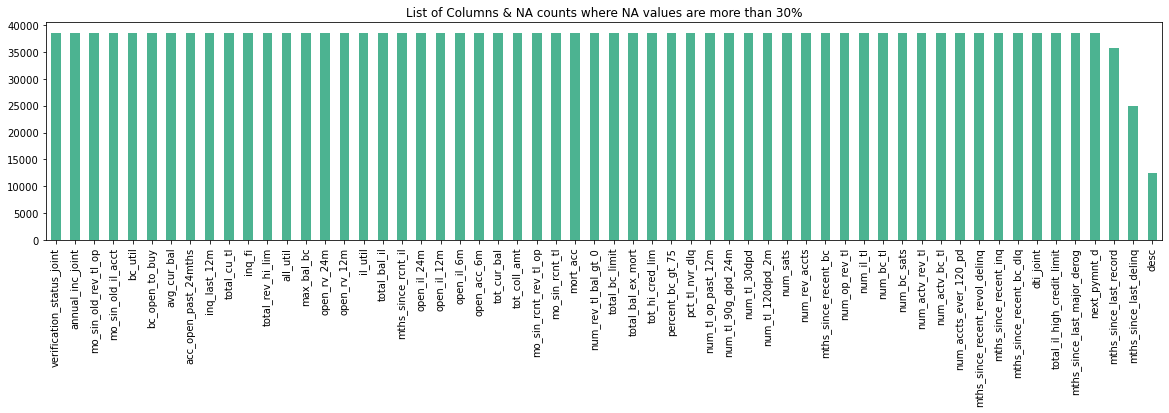

In [4]:
# List of Columns & NA counts where NA values are more than 30%
NA_col = df.isnull().sum().sort_values(ascending = False)
NA_col = NA_col[NA_col.values >(0.30*len(df))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar', color="#4CB391")
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

In [5]:
# removing all the columns having more than 30% of missing value. Because it will vary the result accuracy due to null value.

df = df[df.columns[df.isnull().mean()<0.30]]

# removing all the rows having more than 10 null value as the details are not worth to consider if its insufficient to 
# describe one's reason.

df = df.dropna(thresh=df.shape[1]-10)

# let us remove the columns which having non unique values

df = df[df.columns[df.nunique()>1]]

#url and title are not necessary and some unique variables are also not helpfull for analysis so id and memberid can be removed

df = df.drop(["url", "title", "id", "member_id"],axis=1) 


print(df.shape)

(38577, 38)


In [6]:
# pre processing of data to get good quality of data

#converting columns to there real data type which help for anallysis

df['term']=df['term'].replace([r'[a-z]'],"" ,regex=True).astype(int) 
df['int_rate']=df['int_rate'].replace([r'%'],'',regex=True ).astype(float)
df['revol_util']=df['revol_util'].replace([r'%'],'',regex=True ).astype(float)
df['zip_code']=df['zip_code'].replace([r'xx'],'', regex=True).astype(int)

# let us consider employee having less than 1 year as 0 year experience and 10+ as 11

df['emp_length']=df['emp_length'].replace([r'years',  r"10\+", r"< 1", r"year"],["",11,0,""], regex=True).replace(np.nan,0).astype(int)

df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_month'] = df['issue_d'].apply(lambda x: x.month)
df['issue_year'] = df['issue_d'].apply(lambda x: x.year)
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

print(df.shape)

(38577, 40)


In [7]:
# observing the numerical data and check if variables have different data or maximum data have 0 value.
df.describe()

loan_amnt   funded_amnt  funded_amnt_inv          term  \
count  38577.000000  38577.000000     38577.000000  38577.000000   
mean   11047.025430  10784.058506     10222.481123     41.898437   
std     7348.441646   7090.306027      7022.720644     10.333136   
min      500.000000    500.000000         0.000000     36.000000   
25%     5300.000000   5200.000000      5000.000000     36.000000   
50%     9600.000000   9550.000000      8733.440000     36.000000   
75%    15000.000000  15000.000000     14000.000000     36.000000   
max    35000.000000  35000.000000     35000.000000     60.000000   

           int_rate   installment    emp_length    annual_inc      zip_code  \
count  38577.000000  38577.000000  38577.000000  3.857700e+04  38577.000000   
mean      11.932219    322.466318      5.028696  6.877797e+04    502.918630   
std        3.691327    208.639215      3.925099  6.421868e+04    329.895274   
min        5.420000     15.690000      0.000000  4.000000e+03      7.000000   
25%        8.940000    165.740000      2.000000  4.000000e+04    200.000000   
50%       11.710000    277.860000      4.000000  5.886800e+04    450.000000   
75%       14.380000    425.550000      9.000000  8.200000e+04    852.000000   
max       24.400000   1305.190000     11.000000  6.000000e+06    999.000000   

                dti   delinq_2yrs  inq_last_6mths      open_acc       pub_rec  \
count  38577.000000  38577.000000    38577.000000  38577.000000  38577.000000   
mean      13.272727      0.146668        0.871737      9.275423      0.055422   
std        6.673044      0.492271        1.071546      4.401588      0.237804   
min        0.000000      0.000000        0.000000      2.000000      0.000000   
25%        8.130000      0.000000        0.000000      6.000000      0.000000   
50%       13.370000      0.000000        1.000000      9.000000      0.000000   
75%       18.560000      0.000000        1.000000     12.000000      0.000000   
max       29.990000     11.000000        8.000000     44.000000      4.000000   

           revol_bal    revol_util     total_acc   total_pymnt  \
count   38577.000000  38527.000000  38577.000000  38577.000000   
mean    13289.489826     48.702777     22.052648  11866.970365   
std     15866.492241     28.364741     11.425861   8809.856227   
min         0.000000      0.000000      2.000000      0.000000   
25%      3650.000000     25.200000     13.000000   5513.497338   
50%      8762.000000     49.100000     20.000000   9674.048405   
75%     16912.000000     72.300000     29.000000  16136.952430   
max    149588.000000     99.900000     90.000000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     38577.000000     38577.000000   38577.000000        38577.000000   
mean      11271.196153      9648.322898    2119.243370            1.368634   
std        8700.845592      7009.381200    2389.499511            7.315880   
min           0.000000         0.000000       0.000000            0.000000   
25%        5019.590000      4500.000000     643.990000            0.000000   
50%        9066.660000      8000.000000    1300.450000            0.000000   
75%       15329.780000     13175.000000    2671.980000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  38577.000000             38577.000000     38577.000000   
mean      98.035545                12.772728      2746.243218   
std      698.650182               150.836853      4494.648131   
min        0.000000                 0.000000         0.000000   
25%        0.000000                 0.000000       217.420000   
50%        0.000000                 0.000000       568.260000   
75%        0.000000                 0.000000      3447.250000   
max    29623.350000              7002.190000     36115.200000   

       pub_rec_bankruptcies   issue_month    issue_year  
count        

In [8]:
# from the above details we know columns [delinq_2yrs, inq_last_6mths, pub_rec, pub_rec_bankruptcies] have 0 as maximum value and 

# [total_rec_late_fee, recoveries, collection_recovery_fee] have all the quartile till 75% are 0(Quantile in statistics is a value at which 
# or below lies a given percentage of value of the distribution).

# funded_amnt,funded_amnt_inv and loan_amnt are near to loan amount which we may remove others except loan_amnt

df = df.drop(["funded_amnt","funded_amnt_inv","delinq_2yrs", "inq_last_6mths", "pub_rec", "pub_rec_bankruptcies","total_rec_late_fee","recoveries","collection_recovery_fee"], axis=1)

#changing column name as for understanding

df = df.rename(columns={"term":"term_in_months","emp_title":"employer_name","emp_length":"emp_experience"})


In [9]:
# test how many null value exist now

df.isnull().sum()

loan_amnt                 0
term_in_months            0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
employer_name          2386
emp_experience            0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
zip_code                  0
addr_state                0
dti                       0
earliest_cr_line          0
open_acc                  0
revol_bal                 0
revol_util               50
total_acc                 0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
total_rec_int             0
last_pymnt_d             71
last_pymnt_amnt           0
last_credit_pull_d        2
issue_month               0
issue_year                0
dtype: int64

In [10]:
# as we don't have more employer_name and others we can add 0 as replacment of null

df = df.drop(["employer_name"], axis=1)

#replace remaining null with x

df["revol_util"] = df["revol_util"].replace(np.NaN,0)

print(df.isnull().sum())

loan_amnt               0
term_in_months          0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_experience          0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
open_acc                0
revol_bal               0
revol_util              0
total_acc               0
total_pymnt             0
total_pymnt_inv         0
total_rec_prncp         0
total_rec_int           0
last_pymnt_d           71
last_pymnt_amnt         0
last_credit_pull_d      2
issue_month             0
issue_year              0
dtype: int64


## 3. Data analysis

### Data segregate to buckets or bin

In [11]:
# let us consider monthly income of individual

df["monthly_inc"]= df["annual_inc"]/12

# let us consider percentage of installment per month income because how much percentage of installment payment customer paying w.r.t his income

df["ins_p_mi"] = (df["installment"]/df["monthly_inc"])*100
df["ins_p_mi"]=df["ins_p_mi"].round(2)

# binning of continuous variable
# monthly income
df['monthly_inc_range'] = pd.qcut(df.monthly_inc, q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
# experience
df['emp_exp_range'] = pd.cut(df.emp_experience, [0,1,4,7, 10,11],labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'], include_lowest=True)
# dept to income
df['dti_range'] = pd.qcut(df.dti, q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
# int_range
df['int_range'] = pd.qcut(df.int_rate, q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df.head()
# df['int_range'] = pd.qcut(df.int_rate, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
# df.head()
df['installment_range'] = pd.qcut(df.int_rate, q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df.head()
df['loan_amnt_range'] = pd.qcut(df.int_rate, q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df.head()

df.head()

loan_amnt  term_in_months  int_rate  installment grade sub_grade  \
0       5000              36     10.65       162.87     B        B2   
1       2500              60     15.27        59.83     C        C4   
2       2400              36     15.96        84.33     C        C5   
3      10000              36     13.49       339.31     C        C1   
5       5000              36      7.90       156.46     A        A4   

   emp_experience home_ownership  annual_inc verification_status    issue_d  \
0              11           RENT     24000.0            Verified 2011-12-01   
1               0           RENT     30000.0     Source Verified 2011-12-01   
2              11           RENT     12252.0        Not Verified 2011-12-01   
3              11           RENT     49200.0     Source Verified 2011-12-01   
5               3           RENT     36000.0     Source Verified 2011-12-01   

   loan_status         purpose  zip_code addr_state    dti earliest_cr_line  \
0   Fully Paid     credit_card       860         AZ  27.65       1985-01-01   
1  Charged Off             car       309         GA   1.00       1999-04-01   
2   Fully Paid  small_business       606         IL   8.72       2001-11-01   
3   Fully Paid           other       917         CA  20.00       1996-02-01   
5   Fully Paid         wedding       852         AZ  11.20       2004-11-01   

   open_acc  revol_bal  revol_util  total_acc   total_pymnt  total_pymnt_inv  \
0         3      13648        83.7          9   5863.155187          5833.84   
1         3       1687         9.4          4   1008.710000          1008.71   
2         2       2956        98.5         10   3005.666844          3005.67   
3        10       5598        21.0         37  12231.890000         12231.89   
5         9       7963        28.3         12   5632.210000          5632.21   

   total_rec_prncp  total_rec_int last_pymnt_d  last_pymnt_amnt  \
0          5000.00         863.16   2015-01-01           171.62   
1           456.46         435.17   2013-04-01           119.66   
2          2400.00         605.67   2014-06-01           649.91   
3         10000.00        2214.92   2015-01-01           357.48   
5          5000.00         632.21   2015-01-01           161.03   

  last_credit_pull_d  issue_month  issue_year  monthly_inc  ins_p_mi  \
0         2016-05-01           12        2011       2000.0      8.14   
1         2013-09-01           12        2011       2500.0      2.39   
2         2016-05-01           12        2011       1021.0      8.26   
3         2016-04-01           12        2011       4100.0      8.28   
5         2016-01-01           12        2011       3000.0      5.22   

  monthly_inc_range emp_exp_range  dti_range  int_range installment_range  \
0          VERY_LOW     VERY_HIGH  VERY_HIGH        LOW               LOW   
1          VERY_LOW      VERY_LOW   VERY_LOW  VERY_HIGH         VERY_HIGH   
2          VERY_LOW     VERY_HIGH        LOW  VERY_HIGH         VERY_HIGH   
3               LOW     VERY_HIGH  VERY_HIGH       HIGH              HIGH   
5          VERY_LOW           LOW        LOW   VERY_LOW          VERY_LOW   

  loan_amnt_range  
0             LOW  
1       VERY_HIGH  
2       VERY_HIGH  
3            HIGH  
5        VERY_LOW

In [12]:
# take defaulters(df2) and non defaulters(df1) separate dataframe

df1= df[df['loan_status']=="Fully Paid"]
df2= df[df['loan_status']=="Charged Off"]

print("defaulters numbers are {} and non defaulters are {}".format(df2.shape[0], df1.shape[0]))

defaulters numbers are 5627 and non defaulters are 32950


In [13]:
df.head()

loan_amnt  term_in_months  int_rate  installment grade sub_grade  \
0       5000              36     10.65       162.87     B        B2   
1       2500              60     15.27        59.83     C        C4   
2       2400              36     15.96        84.33     C        C5   
3      10000              36     13.49       339.31     C        C1   
5       5000              36      7.90       156.46     A        A4   

   emp_experience home_ownership  annual_inc verification_status    issue_d  \
0              11           RENT     24000.0            Verified 2011-12-01   
1               0           RENT     30000.0     Source Verified 2011-12-01   
2              11           RENT     12252.0        Not Verified 2011-12-01   
3              11           RENT     49200.0     Source Verified 2011-12-01   
5               3           RENT     36000.0     Source Verified 2011-12-01   

   loan_status         purpose  zip_code addr_state    dti earliest_cr_line  \
0   Fully Paid     credit_card       860         AZ  27.65       1985-01-01   
1  Charged Off             car       309         GA   1.00       1999-04-01   
2   Fully Paid  small_business       606         IL   8.72       2001-11-01   
3   Fully Paid           other       917         CA  20.00       1996-02-01   
5   Fully Paid         wedding       852         AZ  11.20       2004-11-01   

   open_acc  revol_bal  revol_util  total_acc   total_pymnt  total_pymnt_inv  \
0         3      13648        83.7          9   5863.155187          5833.84   
1         3       1687         9.4          4   1008.710000          1008.71   
2         2       2956        98.5         10   3005.666844          3005.67   
3        10       5598        21.0         37  12231.890000         12231.89   
5         9       7963        28.3         12   5632.210000          5632.21   

   total_rec_prncp  total_rec_int last_pymnt_d  last_pymnt_amnt  \
0          5000.00         863.16   2015-01-01           171.62   
1           456.46         435.17   2013-04-01           119.66   
2          2400.00         605.67   2014-06-01           649.91   
3         10000.00        2214.92   2015-01-01           357.48   
5          5000.00         632.21   2015-01-01           161.03   

  last_credit_pull_d  issue_month  issue_year  monthly_inc  ins_p_mi  \
0         2016-05-01           12        2011       2000.0      8.14   
1         2013-09-01           12        2011       2500.0      2.39   
2         2016-05-01           12        2011       1021.0      8.26   
3         2016-04-01           12        2011       4100.0      8.28   
5         2016-01-01           12        2011       3000.0      5.22   

  monthly_inc_range emp_exp_range  dti_range  int_range installment_range  \
0          VERY_LOW     VERY_HIGH  VERY_HIGH        LOW               LOW   
1          VERY_LOW      VERY_LOW   VERY_LOW  VERY_HIGH         VERY_HIGH   
2          VERY_LOW     VERY_HIGH        LOW  VERY_HIGH         VERY_HIGH   
3               LOW     VERY_HIGH  VERY_HIGH       HIGH              HIGH   
5          VERY_LOW           LOW        LOW   VERY_LOW          VERY_LOW   

  loan_amnt_range  
0             LOW  
1       VERY_HIGH  
2       VERY_HIGH  
3            HIGH  
5        VERY_LOW

### 1. univariate analysis of categorical variable

In [14]:
def uni_cat(col):
    # univarient analysis for fully paid(non defaulties)
    title2 = col + ' of charged off customers'
    c0 = df2[col].value_counts()
    dfs2 = pd.DataFrame({'labels': c0.index,'values': c0.values}, index = list(c0.index))
    dfs2.plot(kind='pie',x='labels',y='values',autopct='%1.0f%%',figsize=(18,10))
    plt.title(title2, fontdict={'fontsize':20} )
    plt.xlabel('percentage of '+col+' present')
    plt.ylabel(col)
    plt.show()
    
#     # univarient analysis for fully paid(non defaulties)
#     fig = plt.figure(figsize=(18,10), dpi=800)
#     title1 = col + ' of fully paid customer'
#     c0 = df1[col].value_counts()
#     dfs1 = pd.DataFrame({'labels': c0.index,'values': c0.values}, index = list(c0.index))
#     dfs1.plot(kind='pie',x='labels',y='values',autopct='%1.0f%%',figsize=(18,10))
#     plt.title(title1, fontdict={'fontsize':20} )
#     plt.xlabel('percentage of '+col+' present')
#     plt.ylabel(col)
    
    
    
    #plt.pie(dfs1['values'],labels=dfs1["labels"], autopct='%1.0f%%')
    #plt.pie(dfs2['values'],labels=dfs2["labels"], autopct='%1.0f%%')

    
    #fig = plt.figure(figsize=(18,10), dpi=1600)
    #this line will produce a figure which has 2 row 
    #and 4 columns 
    #(0, 0) specifies the left upper coordinate of your plot
    #ax1 = plt.subplot2grid((2,4),(0,0))
    
    #next 
    
    #ax1 = plt.subplot2grid((2, 4), (0, 1))


### issue year

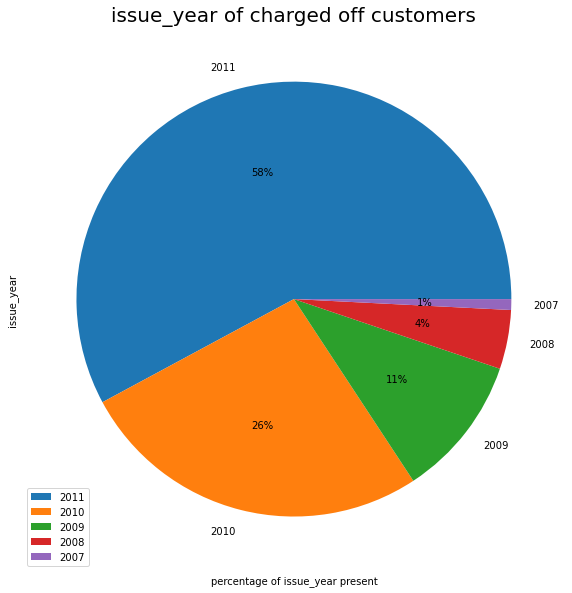

In [15]:
uni_cat('issue_year')

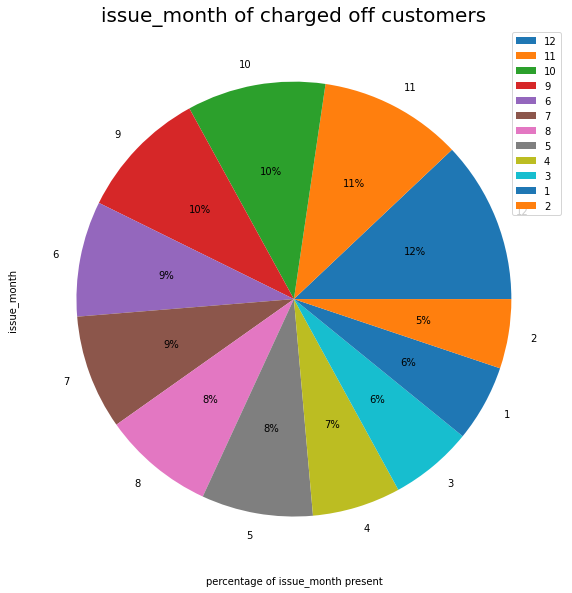

In [16]:
uni_cat('issue_month')

### Home_ownership

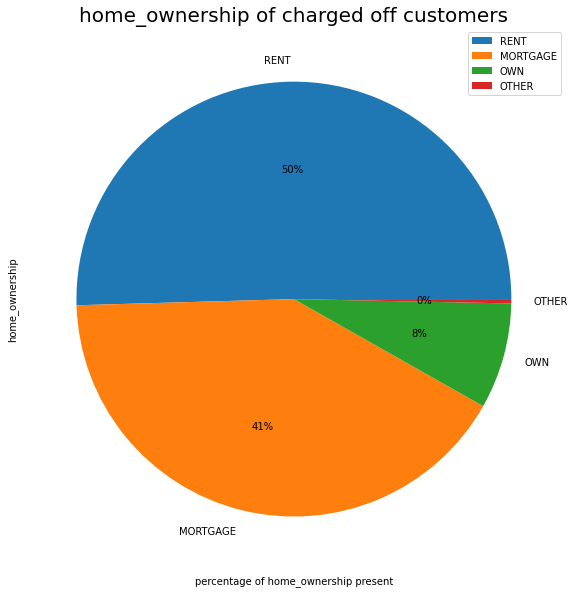

In [17]:
# Home ownership

uni_cat('home_ownership')


From above plot for ‘home_ownership’ we can infer that the defaulters rate is more for rent and mortgage, hence defaulter depends on home_ownership

is home_ownership benificial -> Yes

### term_in_months

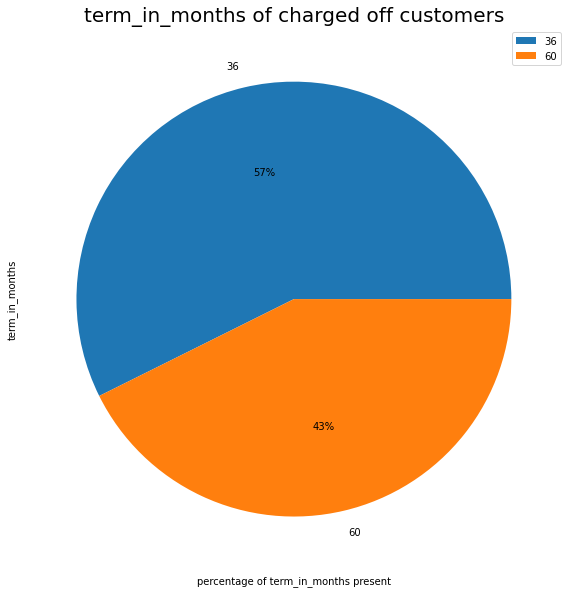

In [18]:
uni_cat('term_in_months')

From above plot for ‘term’ we can infer that the defaulters rate is increasing wrt term, hence the chances of loan getting deaulted is less for 36m than 60m.

is term benificial -> Yes

### grade

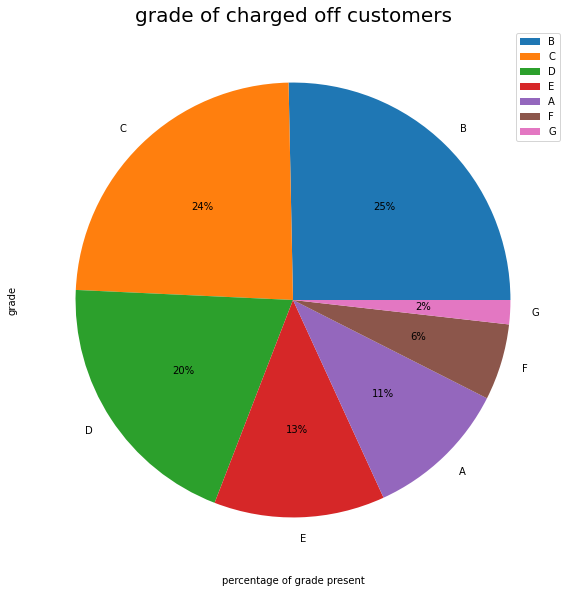

In [19]:
uni_cat('grade')

From above plot for ‘grade’ we can infer that the defaulters rate is increasing wrt grade, hence the chances of loan getting deaulted increases with the grade from B moving towards G but A came in middle we have to verify the reason. B>C>D>E>A>F>G

is grade benificial -> Yes

### addr_state

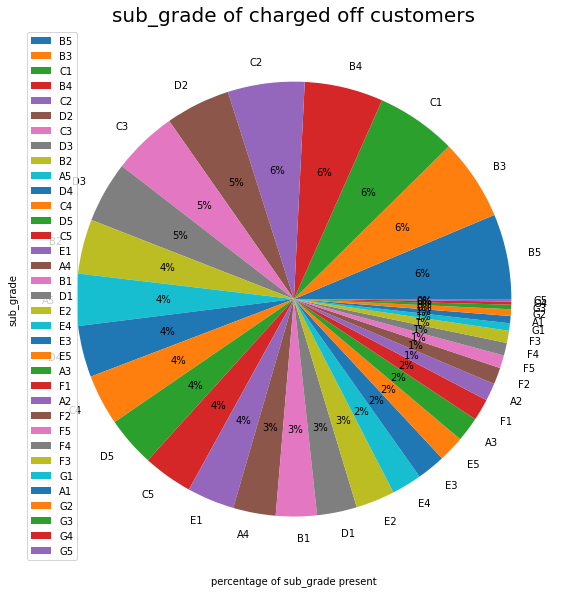

In [20]:
uni_cat('sub_grade')


From above plot for ‘sub_grade’ we can infer that the defaulters rate is increasing wrt sub_grade, hence the chances of loan getting deaulted increases with the sub_grade from B5 moving towards G5 and verify B5 to B1 why its decreasing as other variables increasing from 1 to 5.

is sub_grade benificial -> Yes

### verification_status

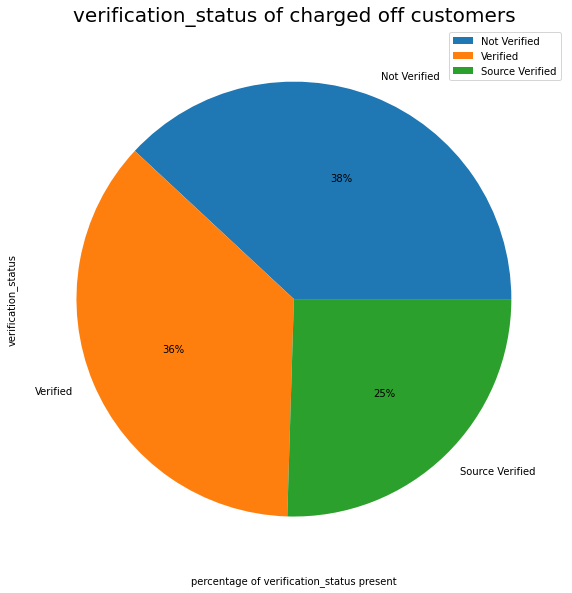

In [21]:
    uni_cat('verification_status')


From above plot for ‘verification_status’ we can infer that the defaulters rate is increasing and is less for Not Verified users than Verified ones, but not useful for analysis.

is verification_status benificial -> No

#### purpose

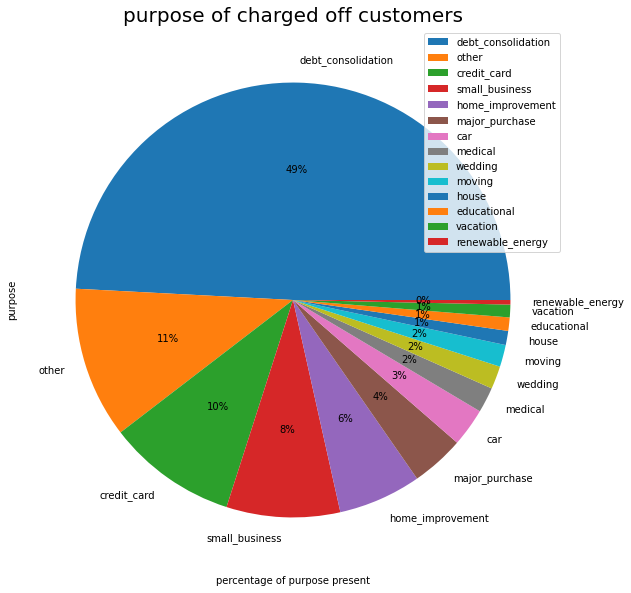

In [22]:
uni_cat('purpose')

From above plot for ‘purpose’ we can infer that the defaulters rate is decreasing from debt_consolidation, hence rate will depend on purpose of the loan

is purpose benificial -> Yes

#### open_acc

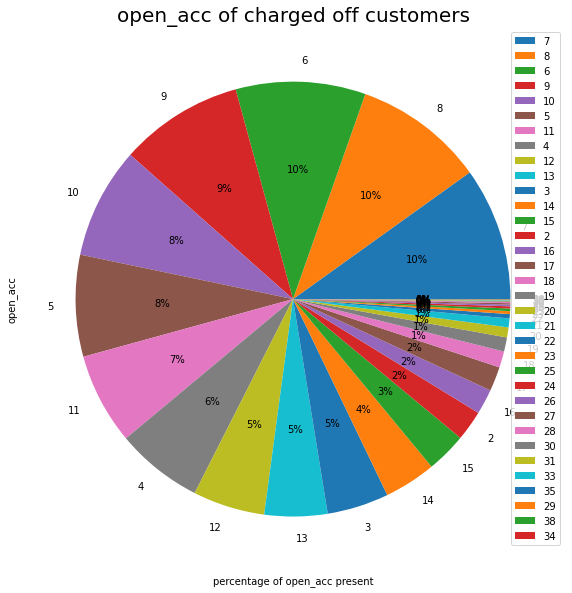

In [23]:
uni_cat('open_acc')

From above plot for ‘open_acc’ we can infer that the defaulters rate is nearly constant for feature open_acc, hence rate will not depend on open_acc feature
is open_acc benificial -> No

### emp_exp_range

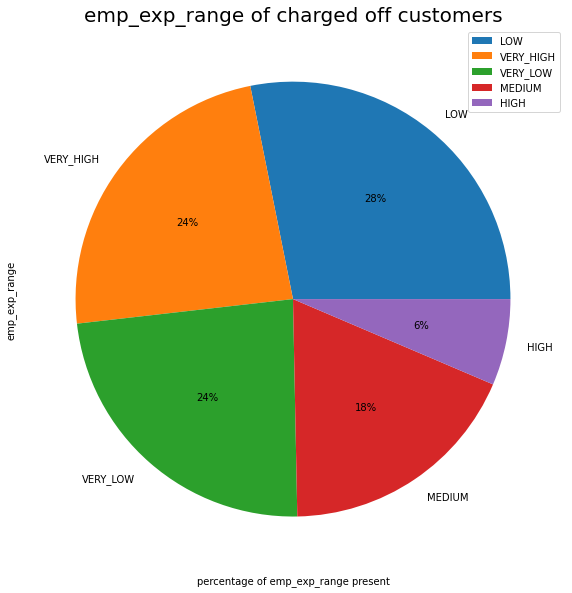

In [24]:
uni_cat('emp_exp_range')


From above plot for ‘emp_exp_range’ we can infer that the defaulters rate is nearly constant for feature emp_exp_range, hence rate will not depend on open_acc feature
is open_acc benificial -> No

### dti_range

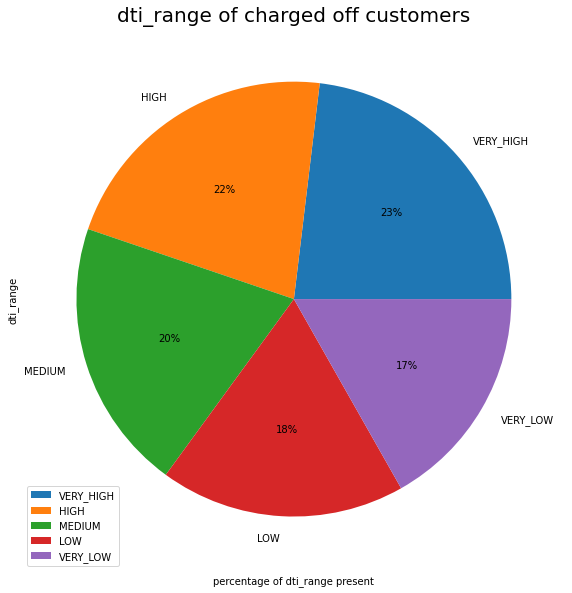

In [25]:
uni_cat('dti_range')

From above plot for ‘dti_range’ we can infer that the defaulters rate is increasing as with dti_range values, hence rate will depend on dti_range feature
is dti_range benificial -> **Yes**

#### interest range

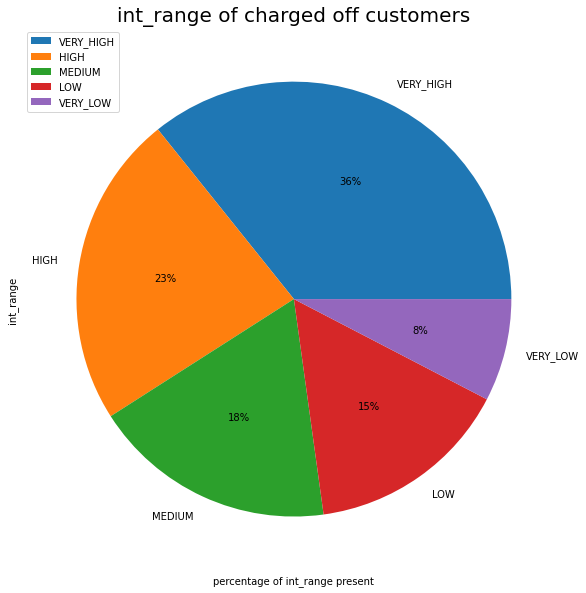

In [26]:
uni_cat('int_range')

From above plot for ‘int_range’ we can infer that the defaulters rate is decreasing with int_range values, hence rate will depend on int_rate_range feature
is int_rate_range benificial -> Yes

#### instsallment_range

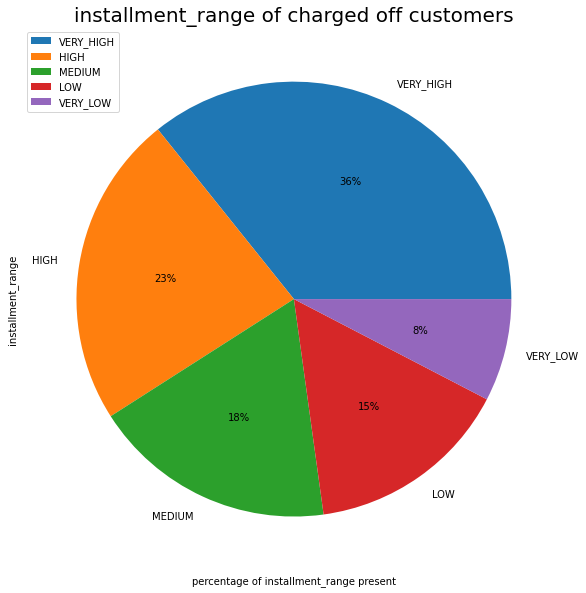

In [27]:
uni_cat('installment_range')

From above plot for ‘installment’ we can infer that the defaulters rate is increasing as with installment values, hence rate will depend on dti_range feature
is installment benificial -> Yes

#### monthly income range

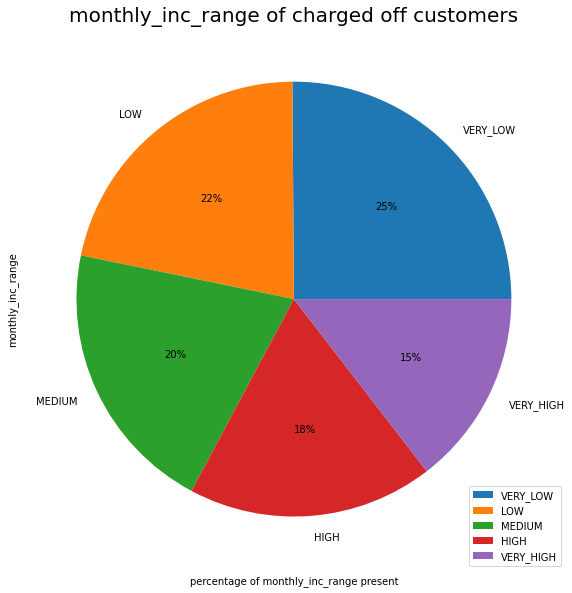

In [28]:
uni_cat('monthly_inc_range')

From above plot for ‘monthly_inc_range’ we can infer that the defaulters rate is decreasing as with monthly_inc_range values, hence rate will depend on annual_inc_range feature
is annual_inc_range benificial -> **Yes**

### 2. univariate analysis of Numerical variables

In [29]:
# Function for univariate plots
f = plt.figure()
f.set_figwidth(28)
f.set_figheight(20)    
def uni(dfs,col,hue =None):
    plt.title("Box Plot")
    sns.boxplot(data=df2, x=col)
    plt.title("Distribution Plot") 
    sns.displot(df2[col], kde=True)
    plt.show()

<Figure size 2016x1440 with 0 Axes>

### loan_amnt

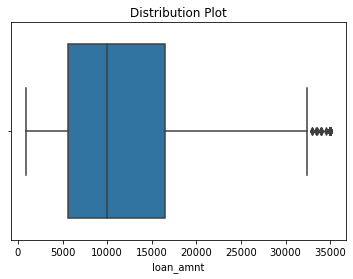

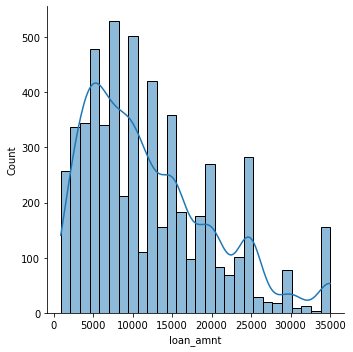

In [30]:
uni(df2, 'loan_amnt')

We can observe some outliers and the first quartile is bigger than third quartile for loan amount which means most of the defaulters clients are from first quartile

### annual_inc

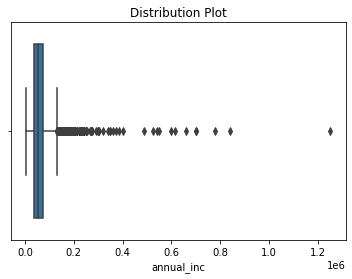

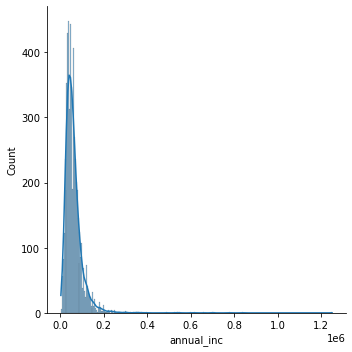

In [31]:
uni(df2, 'annual_inc')

We can observe some outliers and the first quartile is bigger than third quartile for loan amount which means most of the defaulters clients are from first quartile

### installment per month income

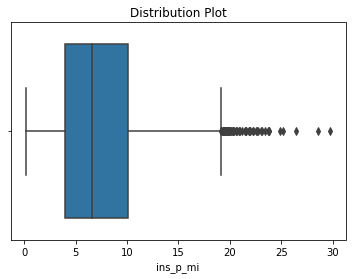

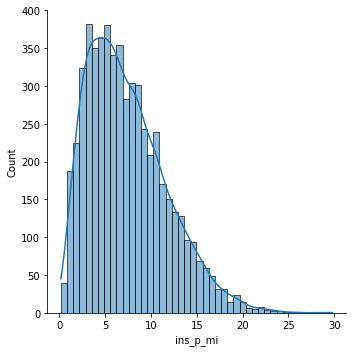

In [32]:
uni(df2, 'ins_p_mi')

We can observe some outliers and the first quartile is bigger than third quartile for loan amount which means most of the defaulters clients are from first quartile

#### Therefore, following are the important feature we deduced from above Univariate analysis:
home_ownership, term_in_months, grade, sub_grade, purpose, int_range, installment_range, dti_range and monthly_inc_range

### 2. Bivariate analysis  (bivariaent analysis of categorical variable v/s numerical variable)

#### analysis-1

In [33]:
# function to plot scatter plot for two features
# def plotScatter(x, y):
#     plt.figure(figsize=(16,6))
#     sns.scatterplot(x=x, y=y, hue="loan_status_nu", data=df)
#     plt.title("Scatter plot between "+x+" and "+y)
#     plt.xlabel(x, fontsize=16)
#     plt.ylabel(y, fontsize=16)
#     plt.show()
    
def plotBivariateBar(x, hue, figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status_nu', hue=hue, data=df)
    plt.title("Loan Default ratio wrt "+x+" feature for hue "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()
    
df["loan_status_nu"] = df["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)

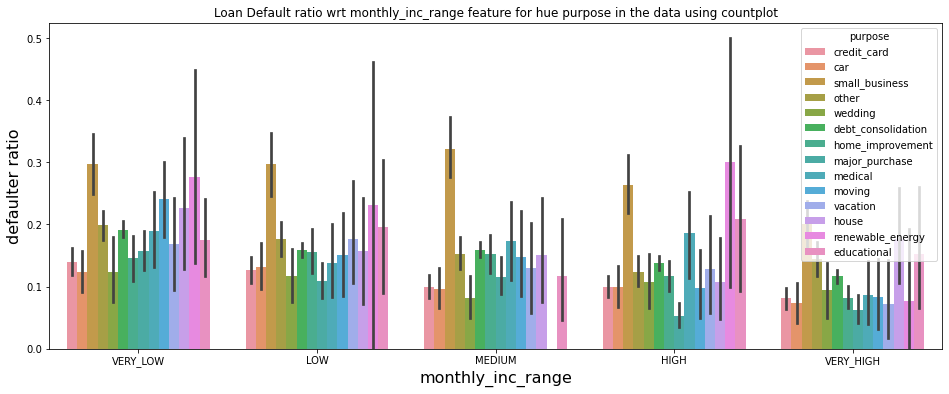

In [34]:
# monthly income vs purpose

plotBivariateBar("monthly_inc_range", "purpose")

From above plot, we can infer it doesn’t shows any correlation
related - N

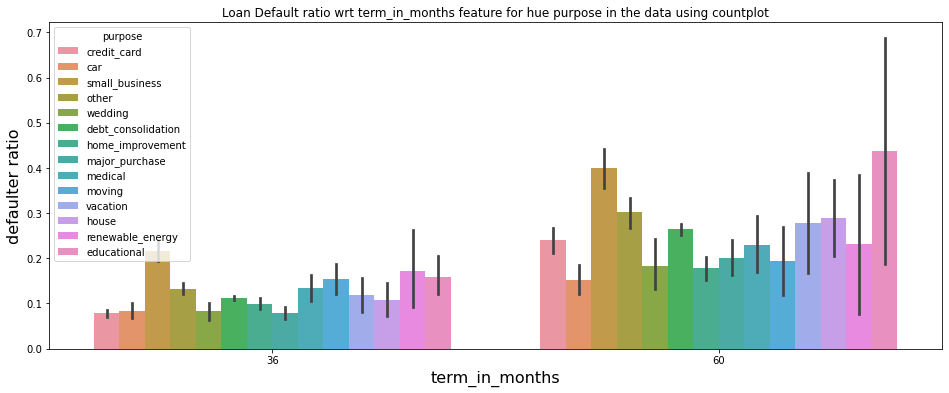

In [35]:
# term vs purpose
plotBivariateBar("term_in_months", "purpose")

As we can see straight lines on the plot, default ratio increases for every purpose wrt terms related - Y

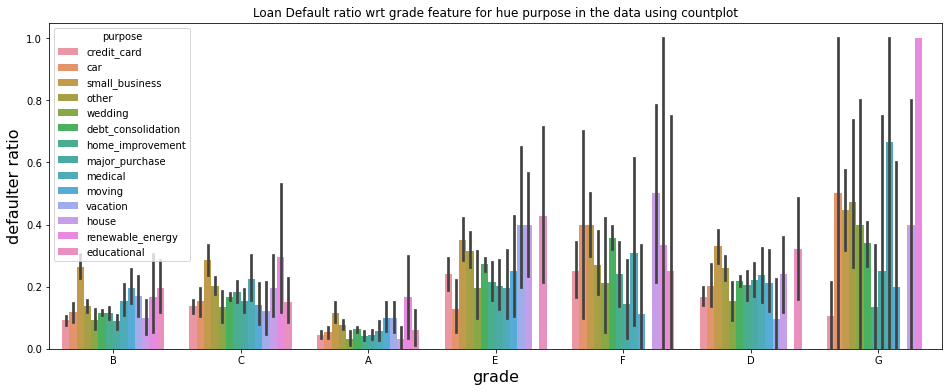

In [36]:
# check for defaulters wrt grade and purpose in the data 
plotBivariateBar("grade", "purpose")

As we can see straight lines on the plot, default ratio increases for every purpose wrt grade
related - Y

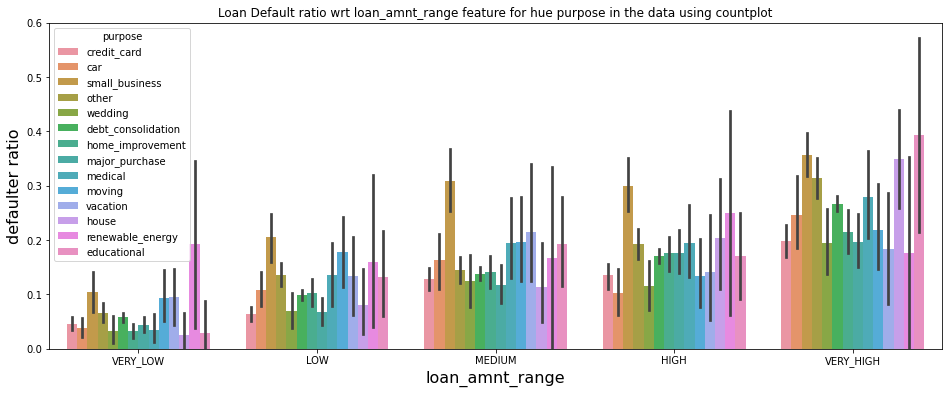

In [37]:
# check for defaulters wrt loan_amnt_range and purpose in the data
plotBivariateBar("loan_amnt_range", "purpose")

As we can see straight lines on the plot, default ratio increases for every purpose wrt loan_amnt_range
related - Y

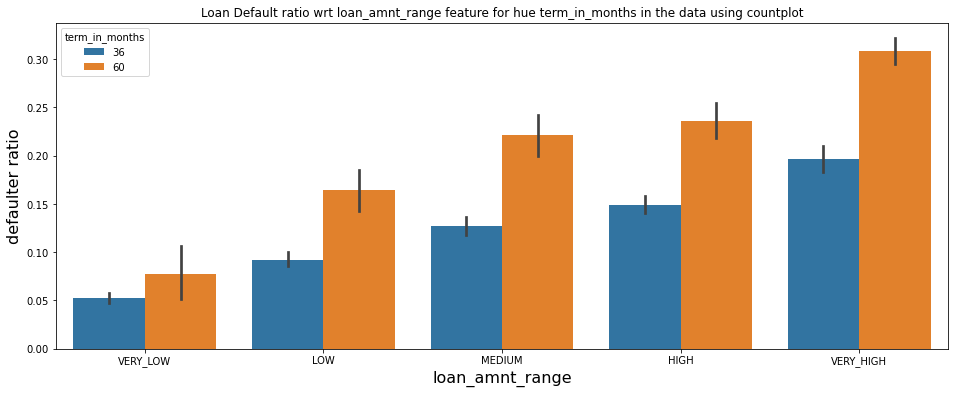

In [38]:
# check for defaulters wrt loan_amnt_range and term_in_months in the data
plotBivariateBar("loan_amnt_range", "term_in_months")

As we can see straight lines on the plot, default ratio increases for every term wrt loan_amnt_range
related - Y

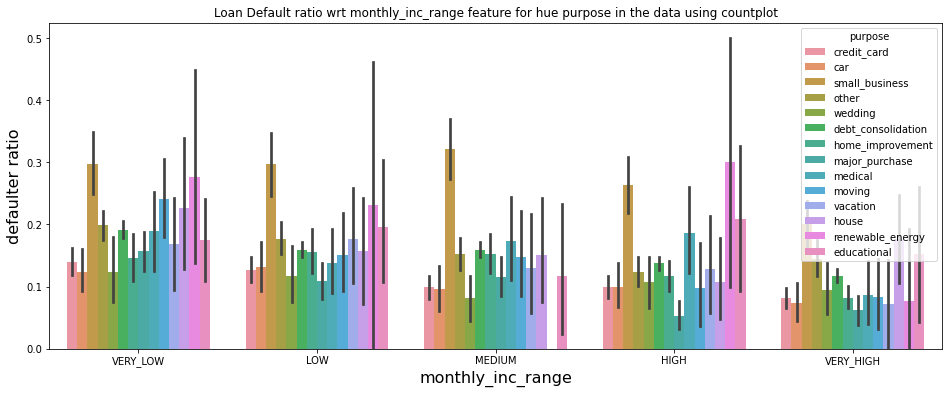

In [39]:
# check for defaulters wrt annual_inc_range and purpose in the data
plotBivariateBar("monthly_inc_range", "purpose")

As we can see straight lines on the plot, default ratio increases for every purpose wrt monthly_inc_range
related - Y

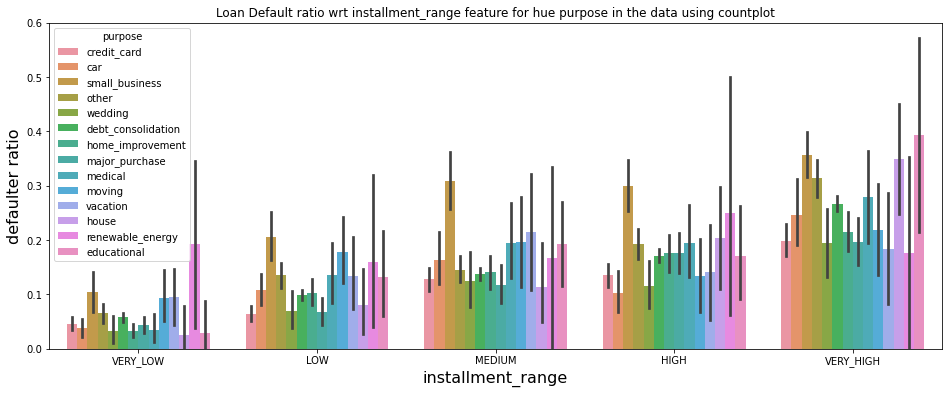

In [40]:
# check for defaulters wrt installment_range and purpose in the data
plotBivariateBar("installment_range", "purpose")

As we can see straight lines on the plot, default ratio increases for every purpose wrt installment except for small_business
related - Y

In [41]:
# verification_stauts vs installment w.r.t home_ownership
# fig = px.box(df2, x="loan_amnt", y="installment", color='home_ownership',
#              title="grade of loan vs loan amount given for defaulters w.r.t monthly income range")
# fig.show()


### 4. Heat map

In [42]:
dfh=df2[['loan_amnt', 'term_in_months', 'int_rate', 'installment', 'emp_experience', 'annual_inc', 'dti', 'open_acc', 'revol_bal','revol_util','total_acc','ins_p_mi']].copy()

<AxesSubplot:>

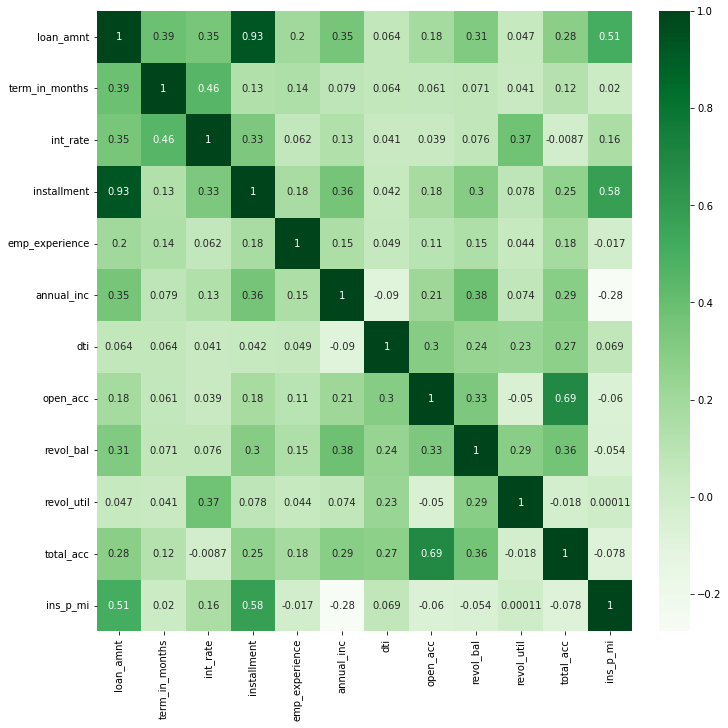

In [43]:
df_defaulters=dfh.corr()
plt.figure(figsize=(10,10), constrained_layout=True)
sns.heatmap(df_defaulters,cmap="Greens", annot=True)
# dfh=dfh.fillna(0)

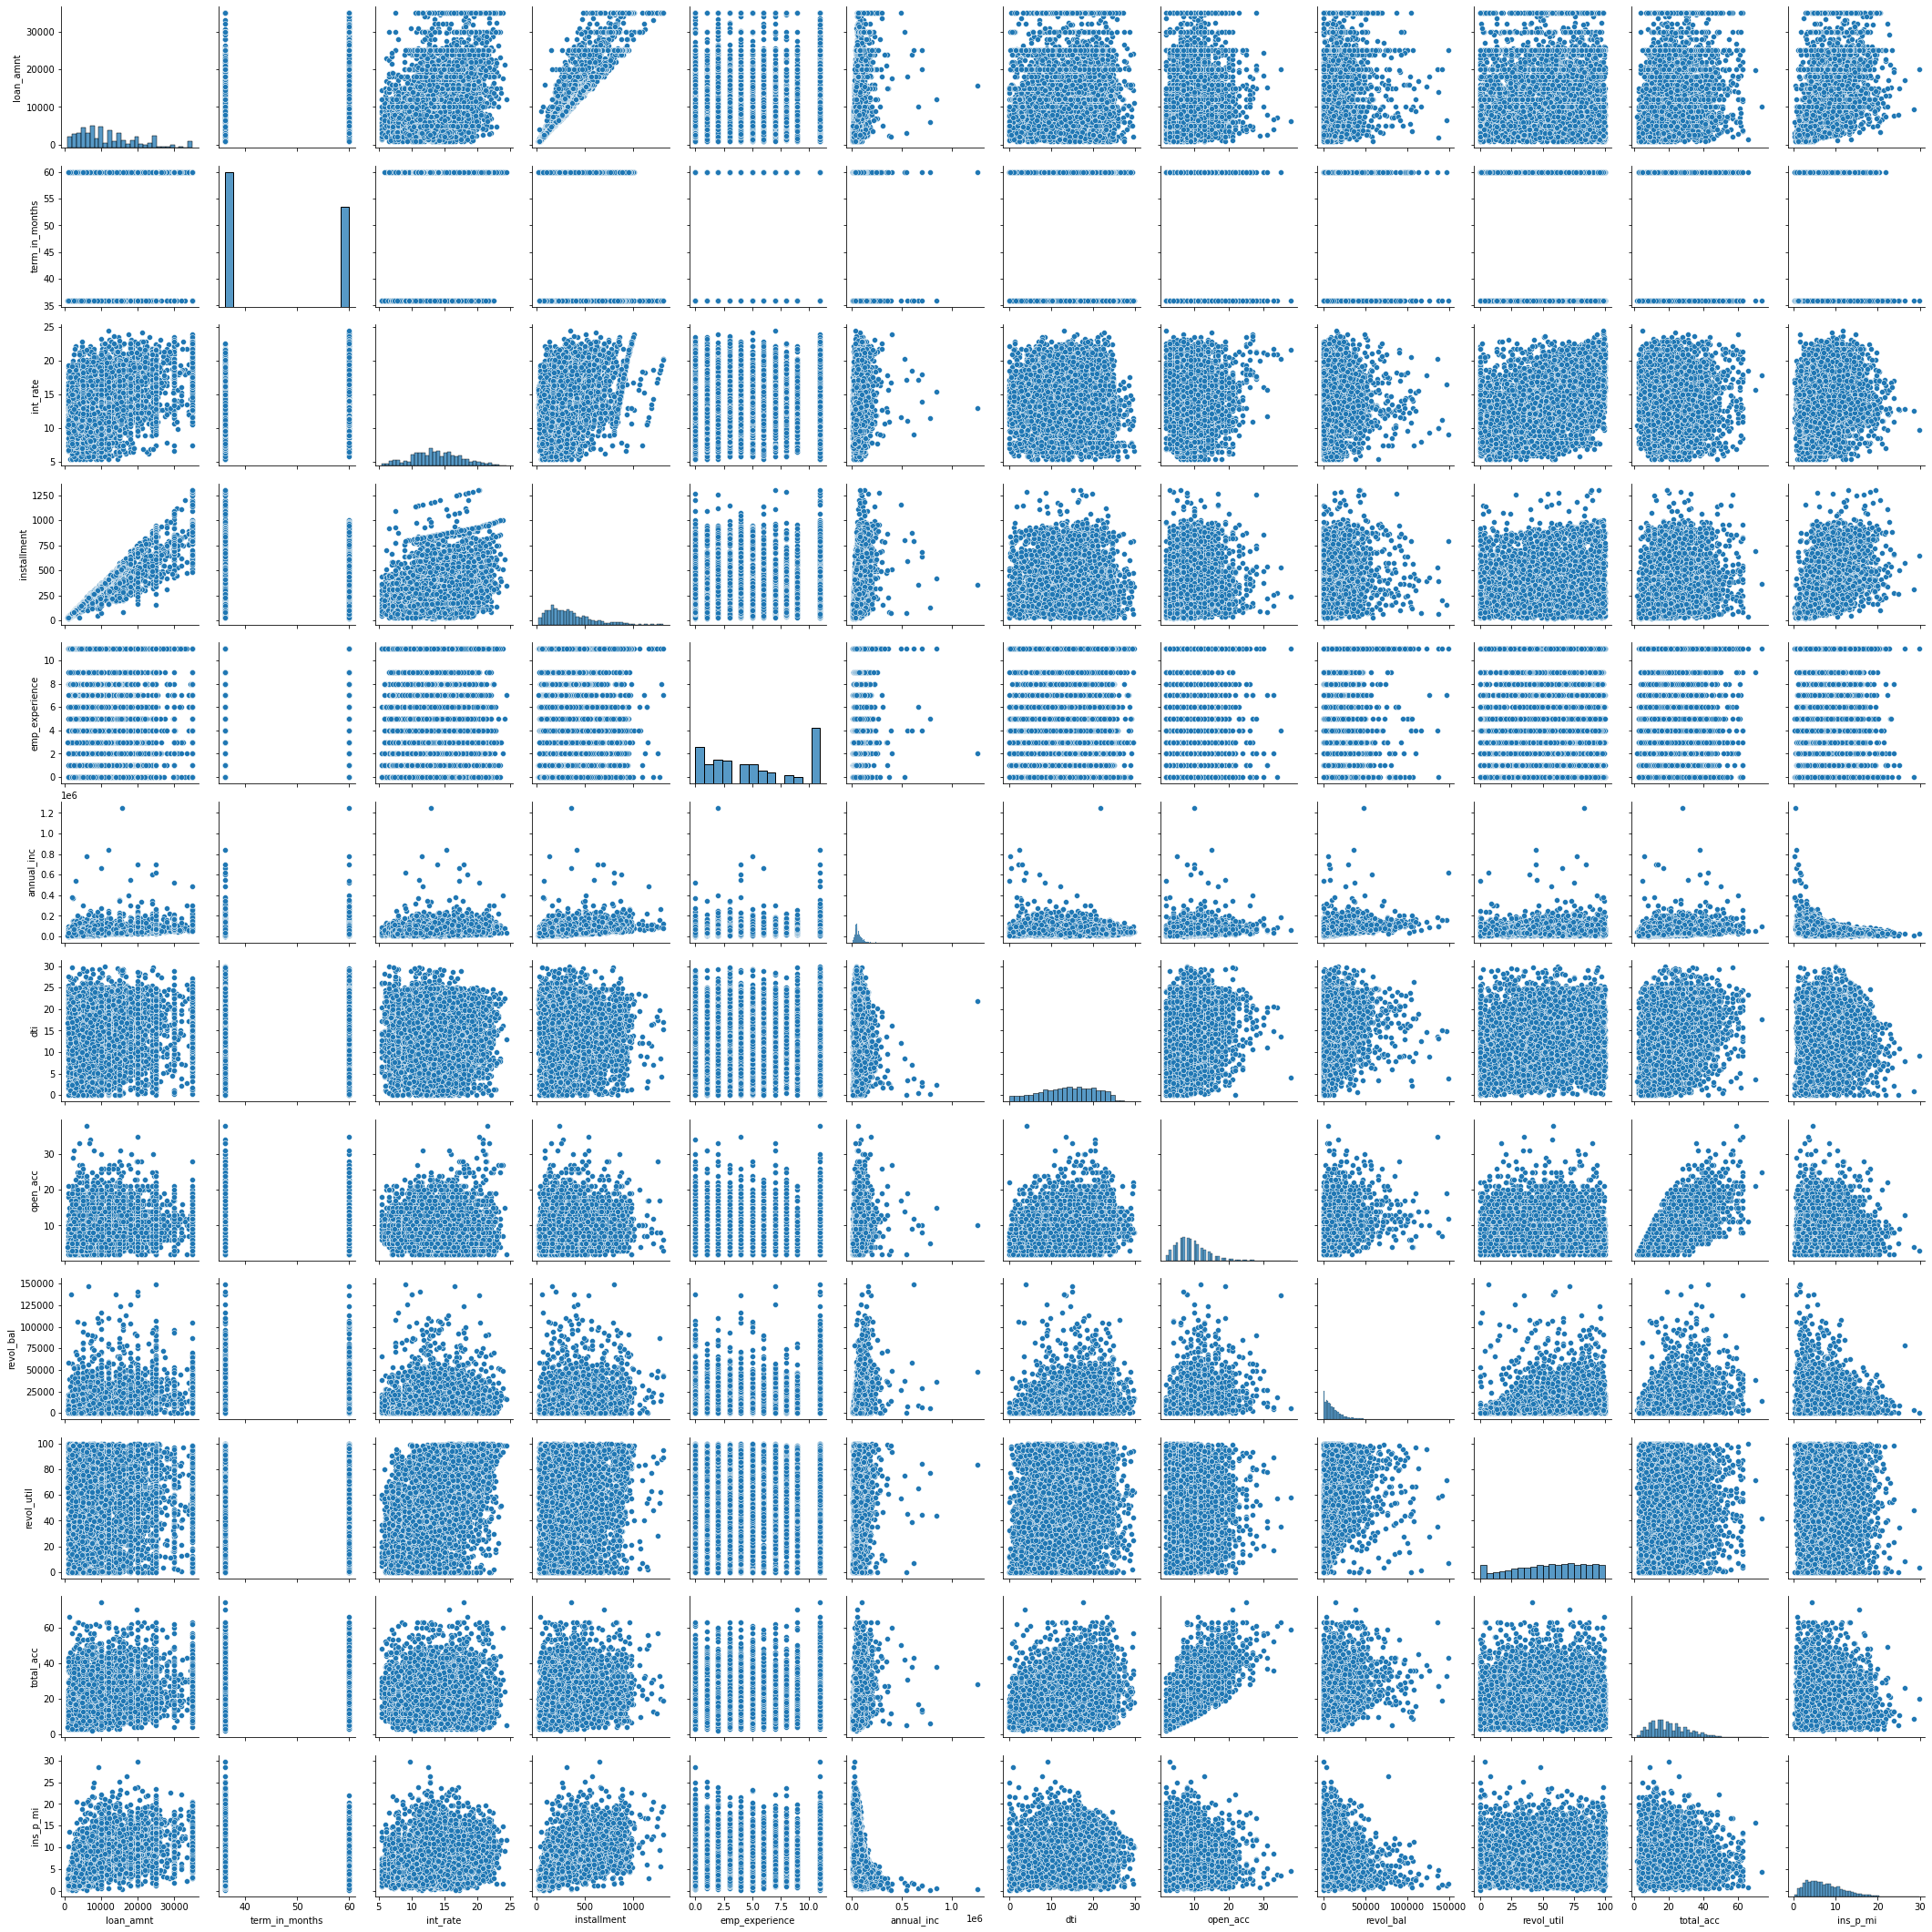

In [44]:
sns.pairplot(dfh)